#### 1.1 Portfolio Choice

We aim to replicate the S&P 500 by constructing a portfolio based on the individual GICS sectors. Additionally, we will incorporate three exogenous factors: a Volatility Index, a Commodity Index, and a Bond Index.

For modeling volatility, we will use the CBOE Volatility Index (VIX), which will serve as a hedge, expected to generate returns primarily when other factors decline. To introduce commodity shocks into the portfolio, we will employ the Bloomberg Commodity Index Total Return (BCOM) as a proxy. Lastly, the Bond markets will be represented by the iShares Core US Aggregate Bond ETF (AGG).

n addition to these three factors, we will integrate four derived Fama-French factors: Small Minus Big (SMB), High Minus Low (HML), Robust Minus Weak (RMW), and Conservative Minus Aggressive (CMA). These factors are calculated based on the daily returns of predefined asset portfolios:

- HML: The average return on two value portfolios (Small Value & Big Value) minus the average return on two growth portfolios (Small Growth & Big Growth).
- RMW: The average return on two robust operating profitability portfolios (Small Robust & Big Robust) minus the average return on two weak operating profitability portfolios (Small Weak & Big Weak).
- CMA: The average return on two conservative investment portfolios (Small Conservative & Big Conservative) minus the average return on two aggressive investment portfolios (Small Aggressive & Big Aggressive).
- SMB: The average return of the six small stock portfolios (including three neutral variants) minus the average return on a corresponding set of nine large stock portfolios with identical categories.

Moreover, we will introduce a fifth custom factor to approximate momentum using sector returns. By applying a 252-day lookback (12 months) for each sector, we will calculate a rolling return for each day. Sectors will be ranked from 1 to 11 based on momentum, and we will construct high and low momentum portfolios by averaging the daily returns of the top three and bottom three sectors, respectively. The difference between these averages will represent the return on our momentum factor.

This approach will provide us with a total of eight external assets in addition to our 11 GICS sectors, collectively aimed at replicating the S&P 500 portfolio. We will allocate 92% of the portfolio to these 11 GICS sectors, weighted according to their representation in the benchmark index. The remaining 8% will be equally distributed across our three exogenous factors and five 'investable' Fama-French factors.

Fig. 1 Portfolio Factors & Data Sources

| Porfolio Factors       | Data Source                                   |
|:-----------------------|:----------------------------------------------|
| Energy                 | iShares U.S. Energy ETF (IYE)                 |
| Materials              | iShares U.S. Materials ETF (IYM)              |
| Industrials            | iShares U.S. Industrials ETF (IYJ)            |
| Consumer Discretionary | iShares U.S. Consumer Disc ETF (IYC)          |
| Consumer Staples       | iShares U.S. Consumer Staples ETF (IYK)       |
| Health Care            | iShares U.S. Healthcare ETF (IYH)             |
| Financials             | iShares U.S. Financials ETF (IYF)             |
| Information Technology | iShares U.S. Technology ETF (IYW)             |
| Communication Services | iShares U.S. Telecom ETF (IYZ)                |
| Utilities              | iShares U.S. Utilities ETF (IDU)              |
| Real Estate            | iShares US Real Estate ETF (IYR)              |
| Volatility (Exo)       | CBOE Volatility Index (VIX)                   |
| Commodities (Exo)      | Bloomberg Commodity Index Total Return (BCOM) |
| Bonds (Exo)            | iShares Core US Aggregate Bond ETF (AGG)      |
| Factor SMB             | Fama-French - Small Minus Big                 |
| Factor HML             | Fama-French - High Minus Low                  |
| Factor RMW             | Fama-French - Robust Minus Weak               |
| Factor CMA             | Fama-French - Conservative Minus Aggressive   |
| Factor MOM             | Custom - Momentum High Minus Low              |

#### 1.2 Portfolio Factor Correlation Matrix

Fig. 2 Correlation Matrix of Portfolio Factors

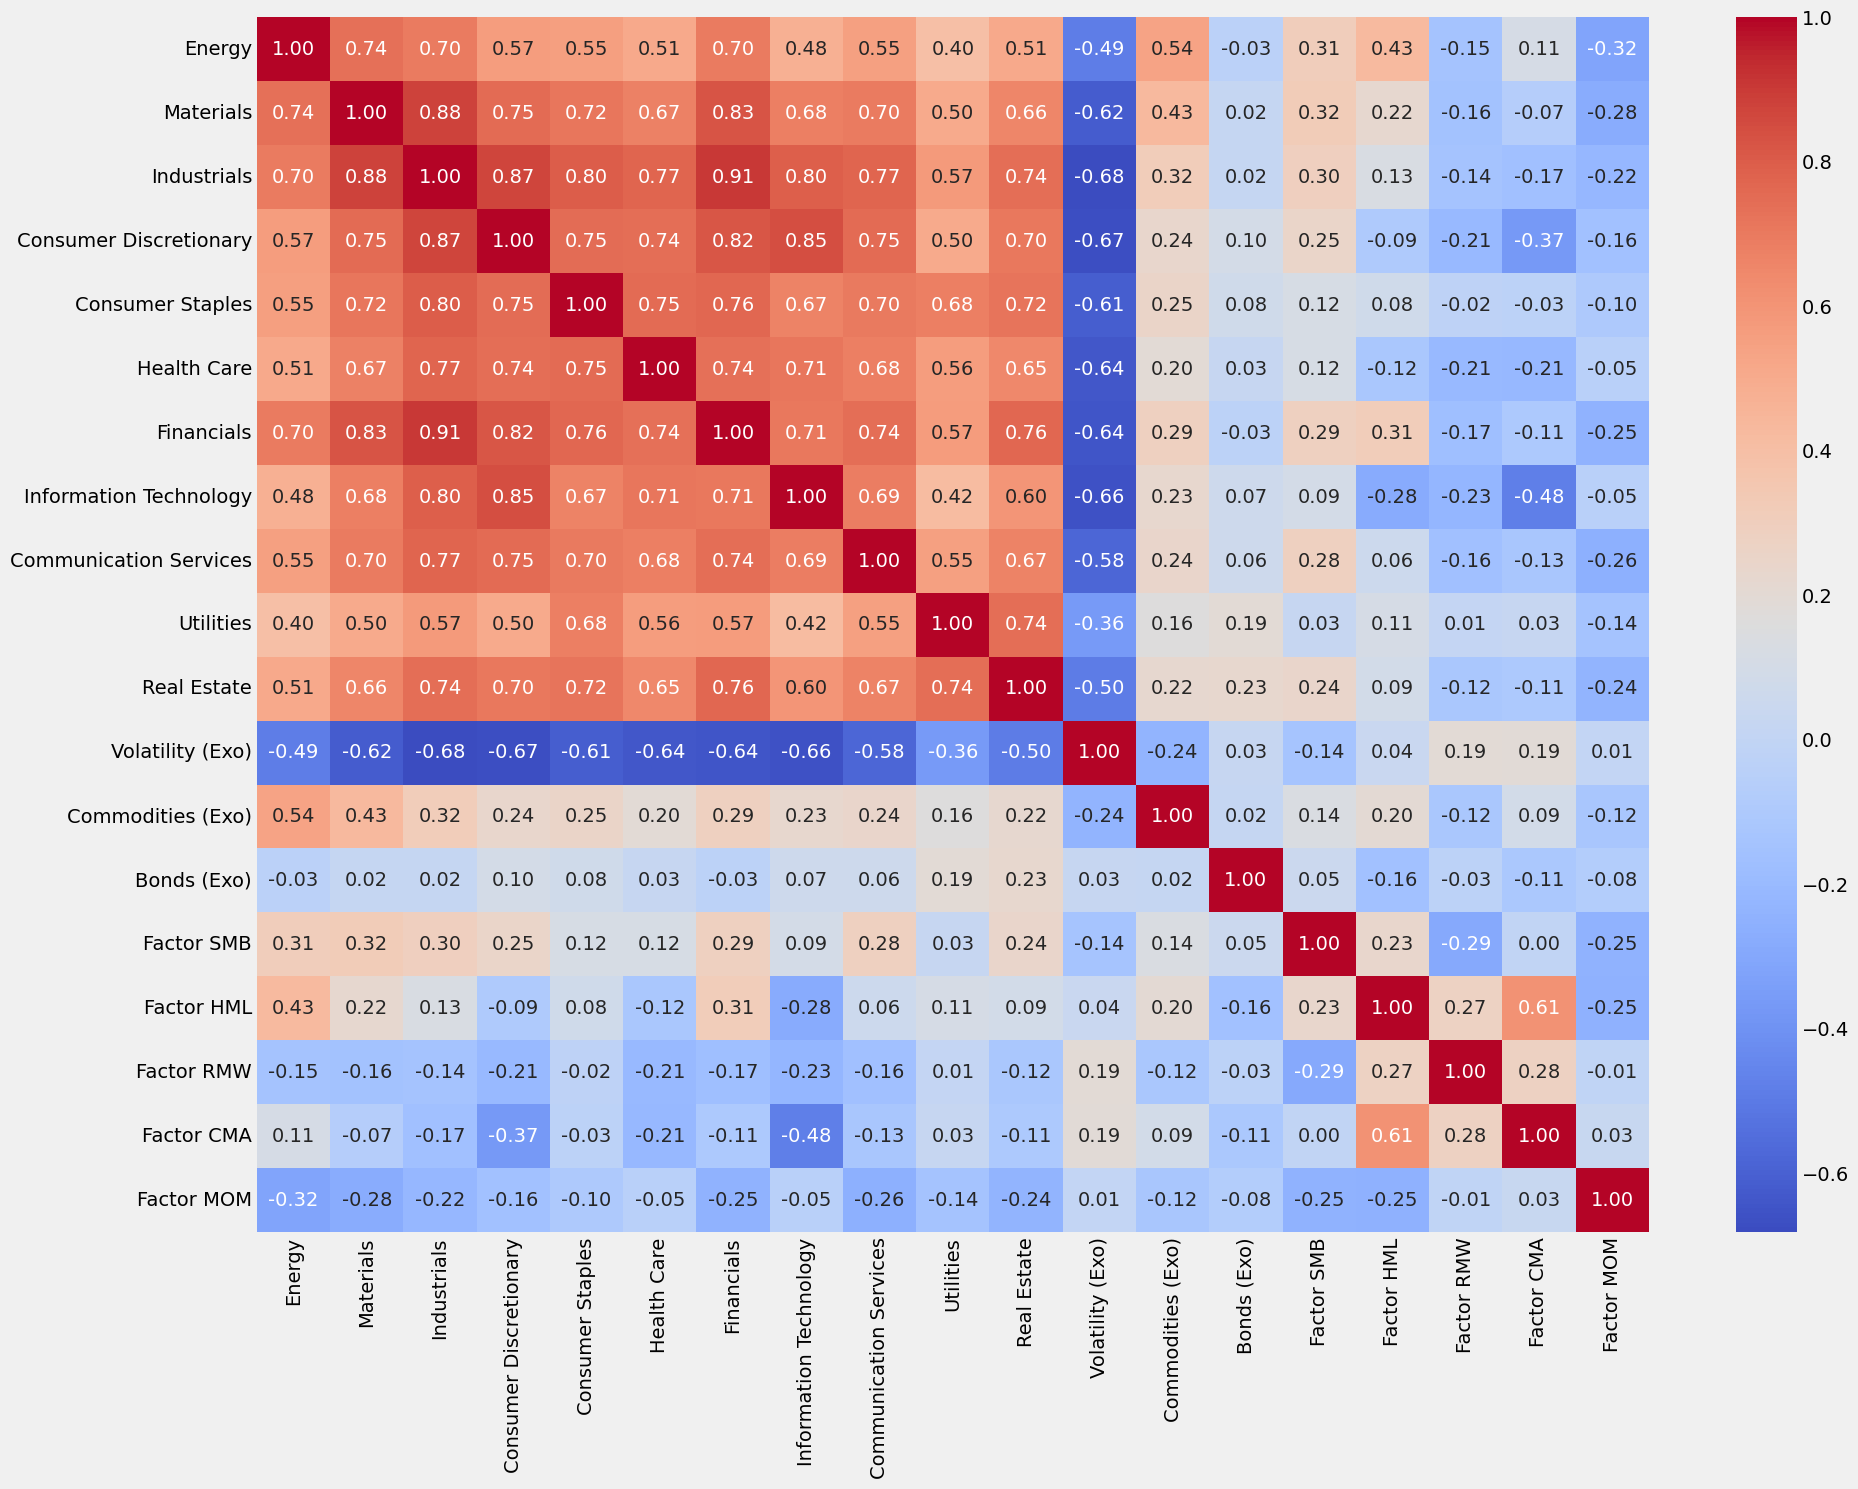

The correlation matrix provides several insightful observations about our prospective portfolio. First, it’s clear that nine out of the eleven S&P 500 GICS sectors exhibit very strong correlations with each other. This high level of interconnectedness suggests that economic expansions and contractions tend to spread rapidly across the U.S. economy. The only sectors showing more moderate correlations are Utilities and Energy. The Energy sector's greater exposure to commodity pricing introduces a degree of counter-cyclicality, while the essential nature of Utilities likely enhances their return robustness, thereby reducing their correlation with the other sectors.

Our exogenous factors are behaving exactly as expected. The VIX displays a strong negative correlation with the S&P 500 sectors, which is intuitive since periods of heightened volatility are typically associated with downturns in major indices. Similarly, the Bloomberg Commodity Index (BCOM) shows only minor correlations with most S&P 500 sectors, with the exception of the Energy and Materials sectors, which are heavily influenced by commodity prices. The bond index exhibits very low correlations—both positive and negative—with all sectors, except for Real Estate, due to their shared sensitivity to interest rate policies.

The 'investable' factors derived from the Fama-French model have minimal correlation with our other factors, outside of their subset. These factors, along with our custom momentum factor, generally show low correlations with the other sector factors. HML and CMA, in particular, exhibit moderate correlation with each other, possibly due to overlapping portfolio characteristics, but overall, intra-correlations among these factors are low. Notably, our custom momentum (MOM) factor adds an interesting diversification effect, as it has zero to low negative correlation with all other factors.

Regarding our portfolio construction, we expect the S&P 500 sector factors to largely mirror the performance of the index. A small allocation to our exogenous and Fama-French factors should enhance diversification, especially during periods of volatility or counter-cyclical movements.

#### 1.3 Rolling Alpha & Beta of Portfolio Factors vs S&P 500 Benchmark

The Capital Asset Pricing Model (CAPM) derived by William Sharpe provides us with a framework to determine the expected return on an asset given its risk relative to the market. 

$$
R_{i,t} - r_{f,t} = \alpha_i + \beta (R_{m,t} - r_{f,t}) + \epsilon_{i,t}
$$

The formula assumes that the excess return on an asset is comprised of three factors. The $\beta$ value measures the sensitivity of asset $i$ relative to the overall market. A higher $\beta$ indicates that a larger portion of the asset’s return can be explained by market movements rather than by idiosyncratic factors. The $\alpha$ and $\epsilon$ terms account for the remaining excess return not attributable to the market. $\alpha$ is often attributed to the skill of a particular manager in selecting the asset, while \$\epsilon$ represents the estimation error in measuring the true value of $\alpha$ and $\beta$. 

We will construct rolling plots of $\alpha$ and $\beta$ for each of our portfolio’s factors to assess their sensitivity to the benchmark and to identify periods when they have generated excess returns independent of the market.

Fig. 3 Rolling Beta of Portfolio Factors vs S&P 500

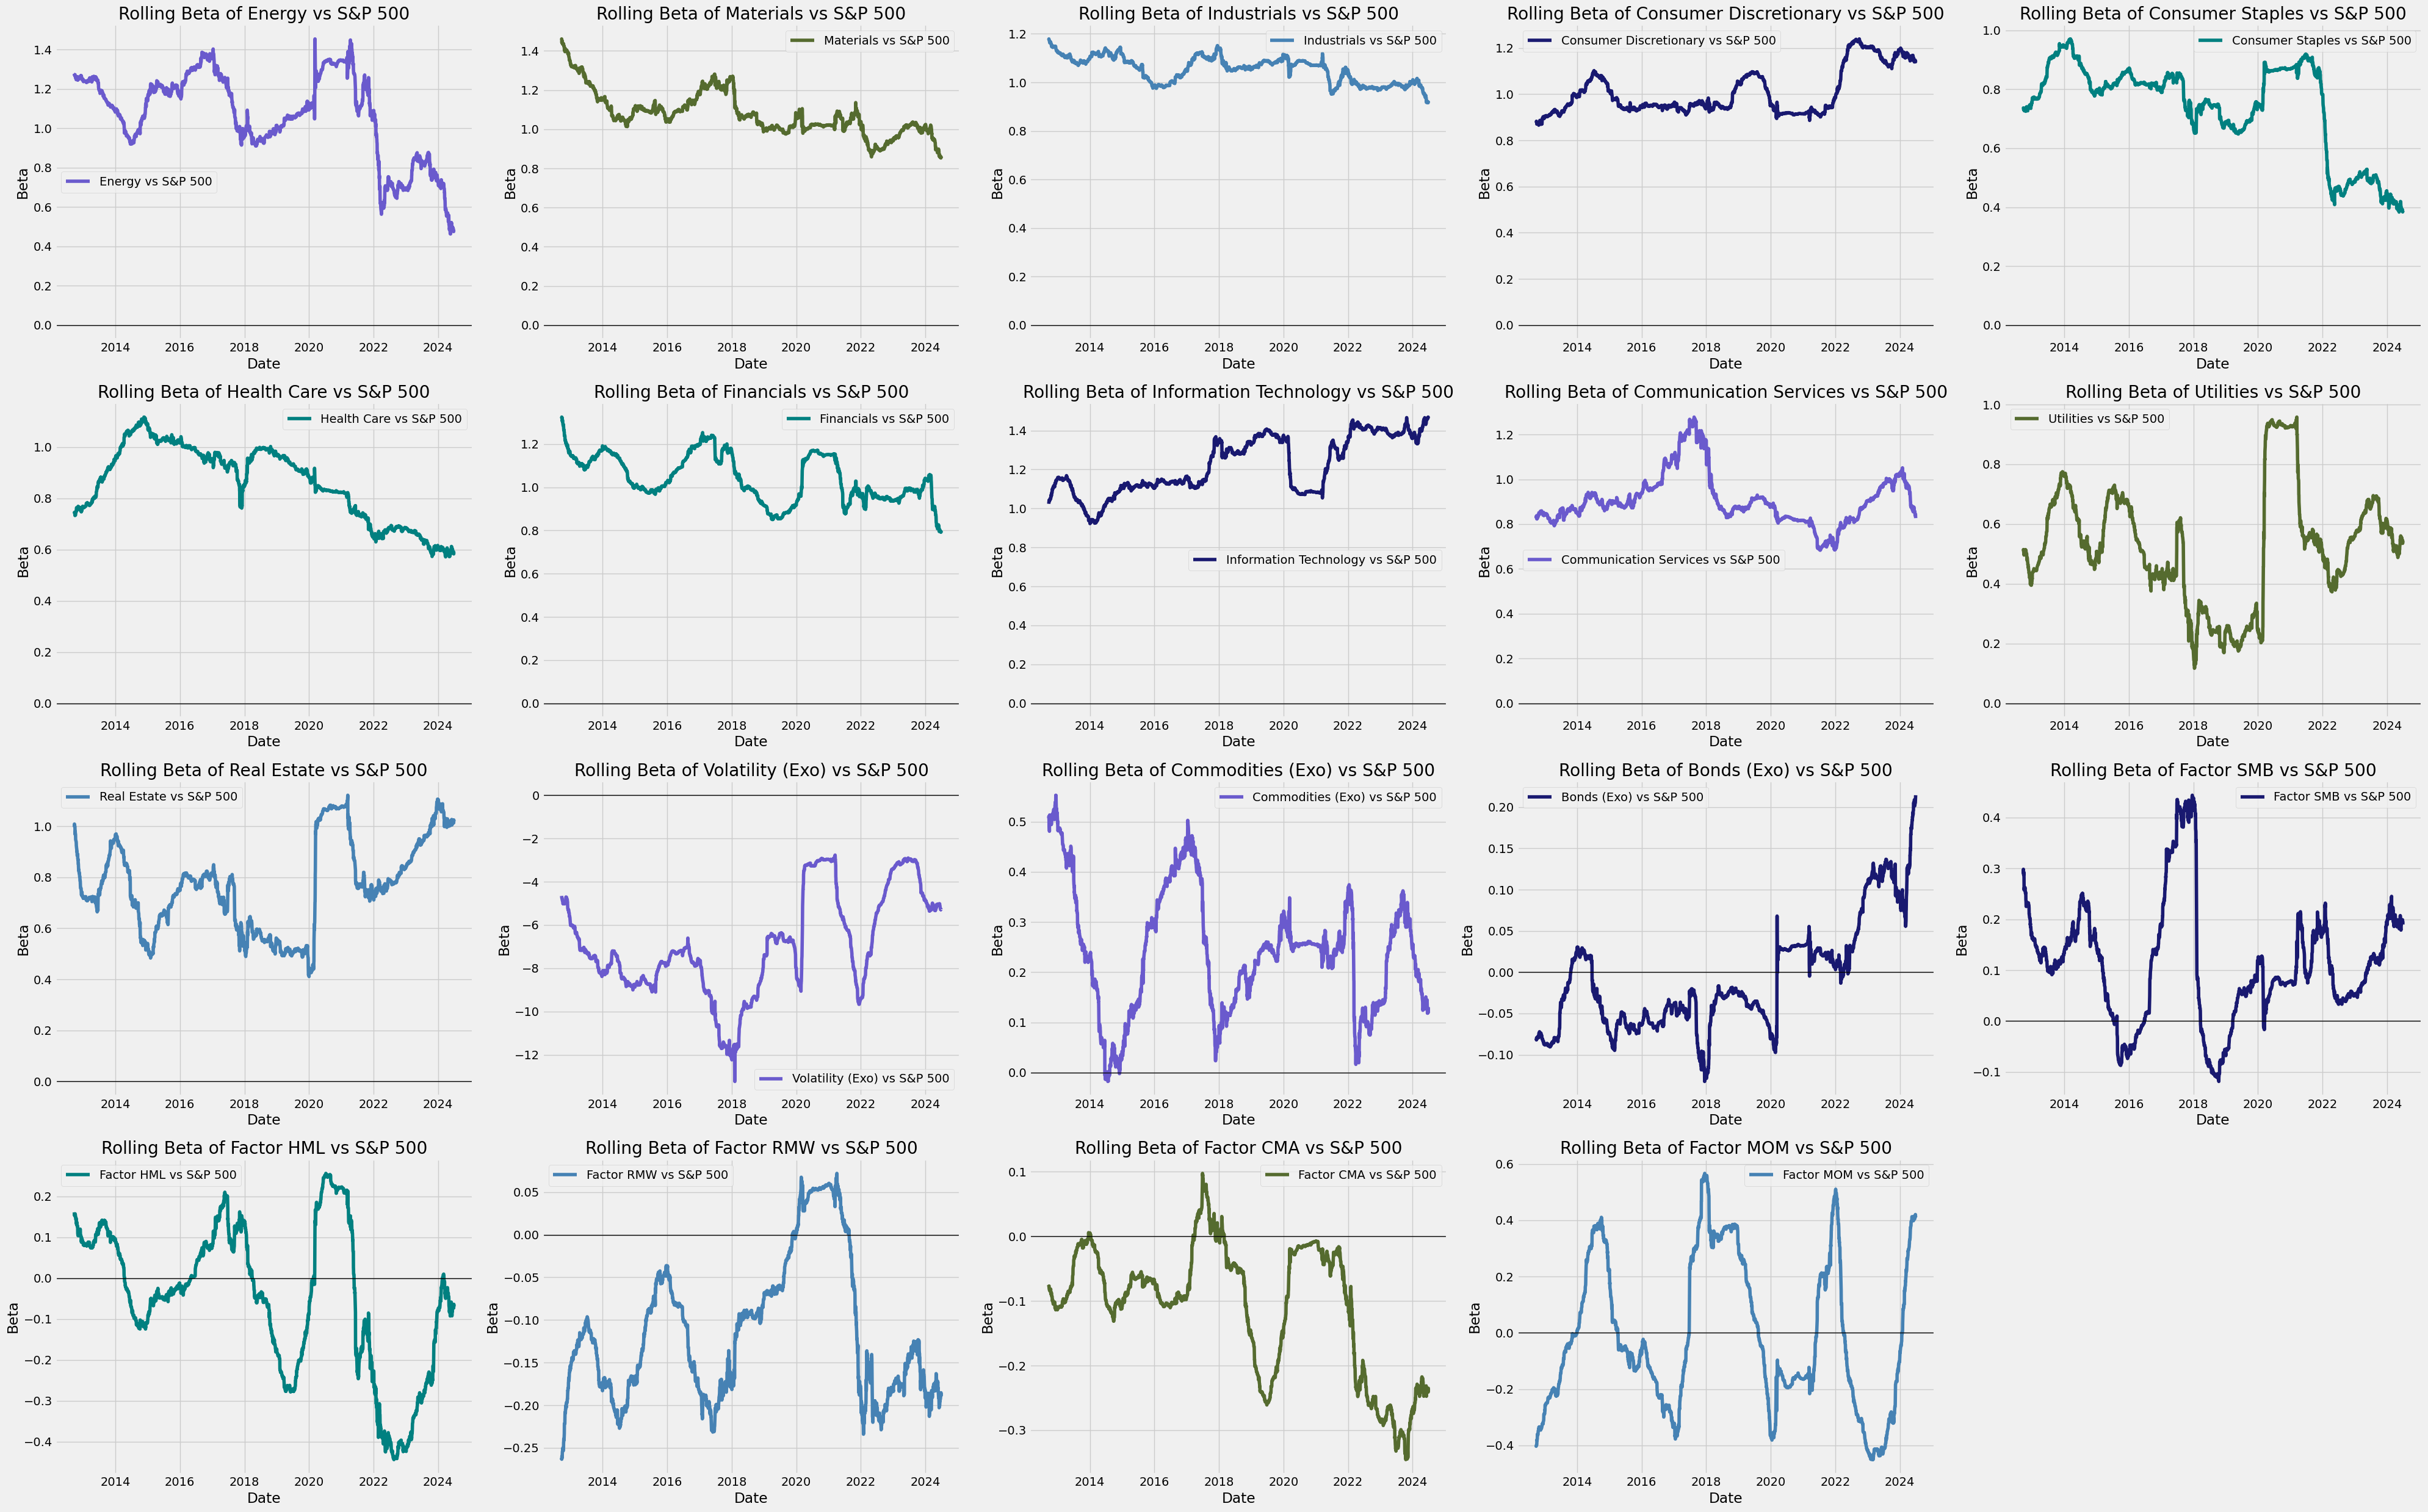

We can now individually compute a rolling beta calculation for each portfolio factor relative to our benchmark index. $\beta$ is a measure of the portfolio factor's sensitivity to the benchmark’s movements. It indicates how much a factor is expected to change in response to a 1% change in the benchmark. A $\beta$ value of 1 suggests that the factor moves in line with the market, while values above 1 indicate that the factor will move in the same direction as the market but with amplified magnitude. Positive beta values indicate a movement in the same direction as the benchmark, while negative $\beta$ values imply an inverse relationship and the factor move in the opposite direction as the benchmark, though the magnitude of the movement is preserved.

There are several interesting themes to highlight from the graphs:

All of our S&P 500 sectors exhibit consistently high degrees of positive $\beta$ relative to the benchmark. Growth-oriented sectors such as Information Technology, Financials, and Consumer Discretionary show very high and increasing levels of $\beta$, while more defensive sectors like Utilities, Consumer Staples, and Energy have lower average $\beta$s, with some showing a downward trend in recent years due to reduced market sensitivity. However, even the less sensitive sectors like Real Estate and Utilities still exhibit a $\beta$ of around 0.6 relative to our benchmark index.

In contrast, our exogenous factors exhibit much lower $\beta$ values relative to the benchmark. Commodities have the highest $\beta$ among these factors but tend to show increased correlation during periods of extreme volatility, when higher commodity prices can disrupt other sectors of the benchmark and cause broader market instability. Bonds display almost no $\beta$ with the benchmark index, except in recent years when rising interest rates have led to shifts in specific sectors like Real Estate and broader market disruption due to the re-pricing of risk. Finally, the VIX index exhibits highly negative and extreme $\beta$ values, indicating a very strong inverse relationship with the benchmark. These three exogenous factors could provide varying degrees of hedging capability within our traditional sector portfolio.

Our Fama-French factors also produce fairly low $\beta$ values relative to the benchmark. In particular, HML, RMW, and CMA have shown declining $\beta$ over time, potentially reflecting that these portfolios are composed of less popular factors during this investment period. SMB has the highest $\beta$ values among these factors and shows moderate correlation with periods of cyclical expansion in the benchmark. Lastly, our custom Momentum factor generally exhibits a negative $\beta$ with the benchmark, but during periods of market stress, it becomes strongly correlated with the index. This suggests that while it may act as a hedge in normal conditions, it could lose its uncorrelated nature during market stress, unlike our VIX factor, which retains its hedging properties.

Fig. 4 Rolling Alpha of Portfolio Factors vs S&P 500

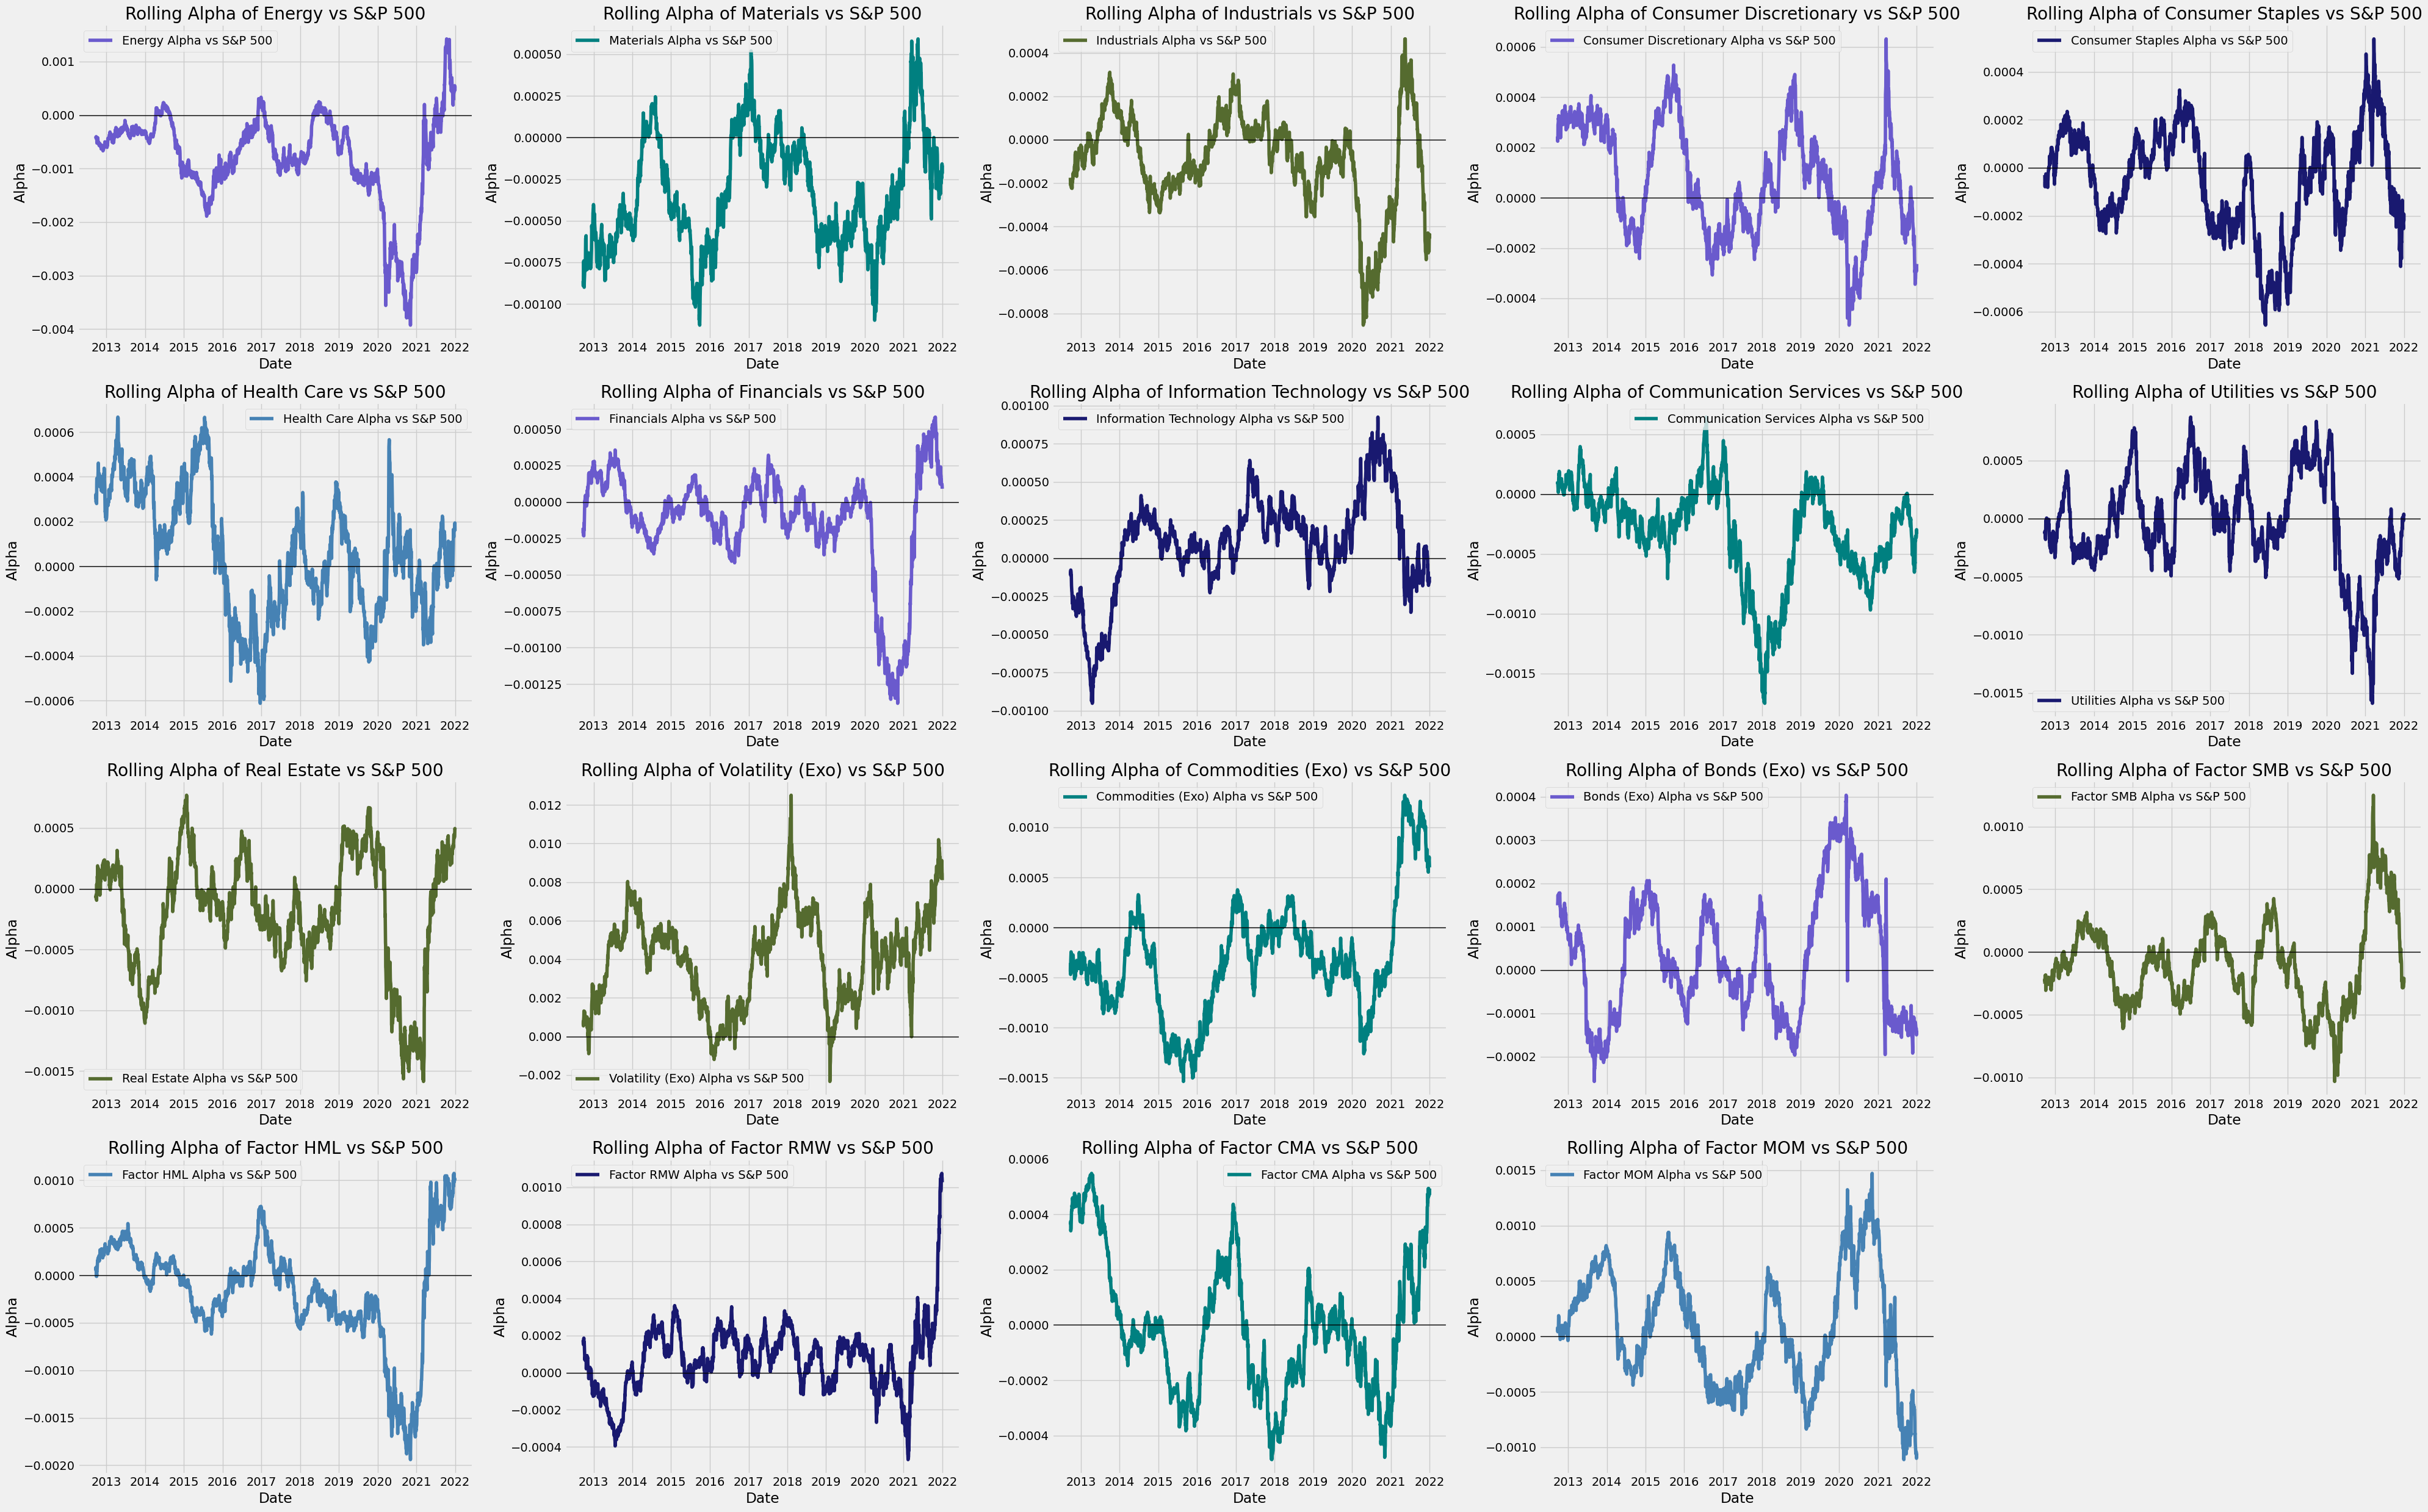

We calculate our rolling alpha by performing a least squares regression between our factor returns and benchmark returns, extracting the intercept value, which represents our $\alpha$. The alpha analysis reveals patterns similar to those seen in our beta graphs. Most of the returns for our sector factors are driven by the benchmark, resulting in $\alpha$ values close to zero. In contrast, we observe consistently high $\alpha$ generated by our exogenous factors, particularly the VIX and Bonds, underscoring their effectiveness as hedges within our sector portfolio. Commodities also exhibit significant peaks in $\alpha$ during periods of market stress, providing another source of outperformance when correctly allocated. Our Fama-French factors show similar behavior to commodities, typically generating low $\alpha$ outside of specific market conditions.

#### 1.3 Portfolio Factors Cumulative Return vs S&P 500 Benchmark

Fig. 5 Cumulative Return of Portfolio Factors vs S&P 500

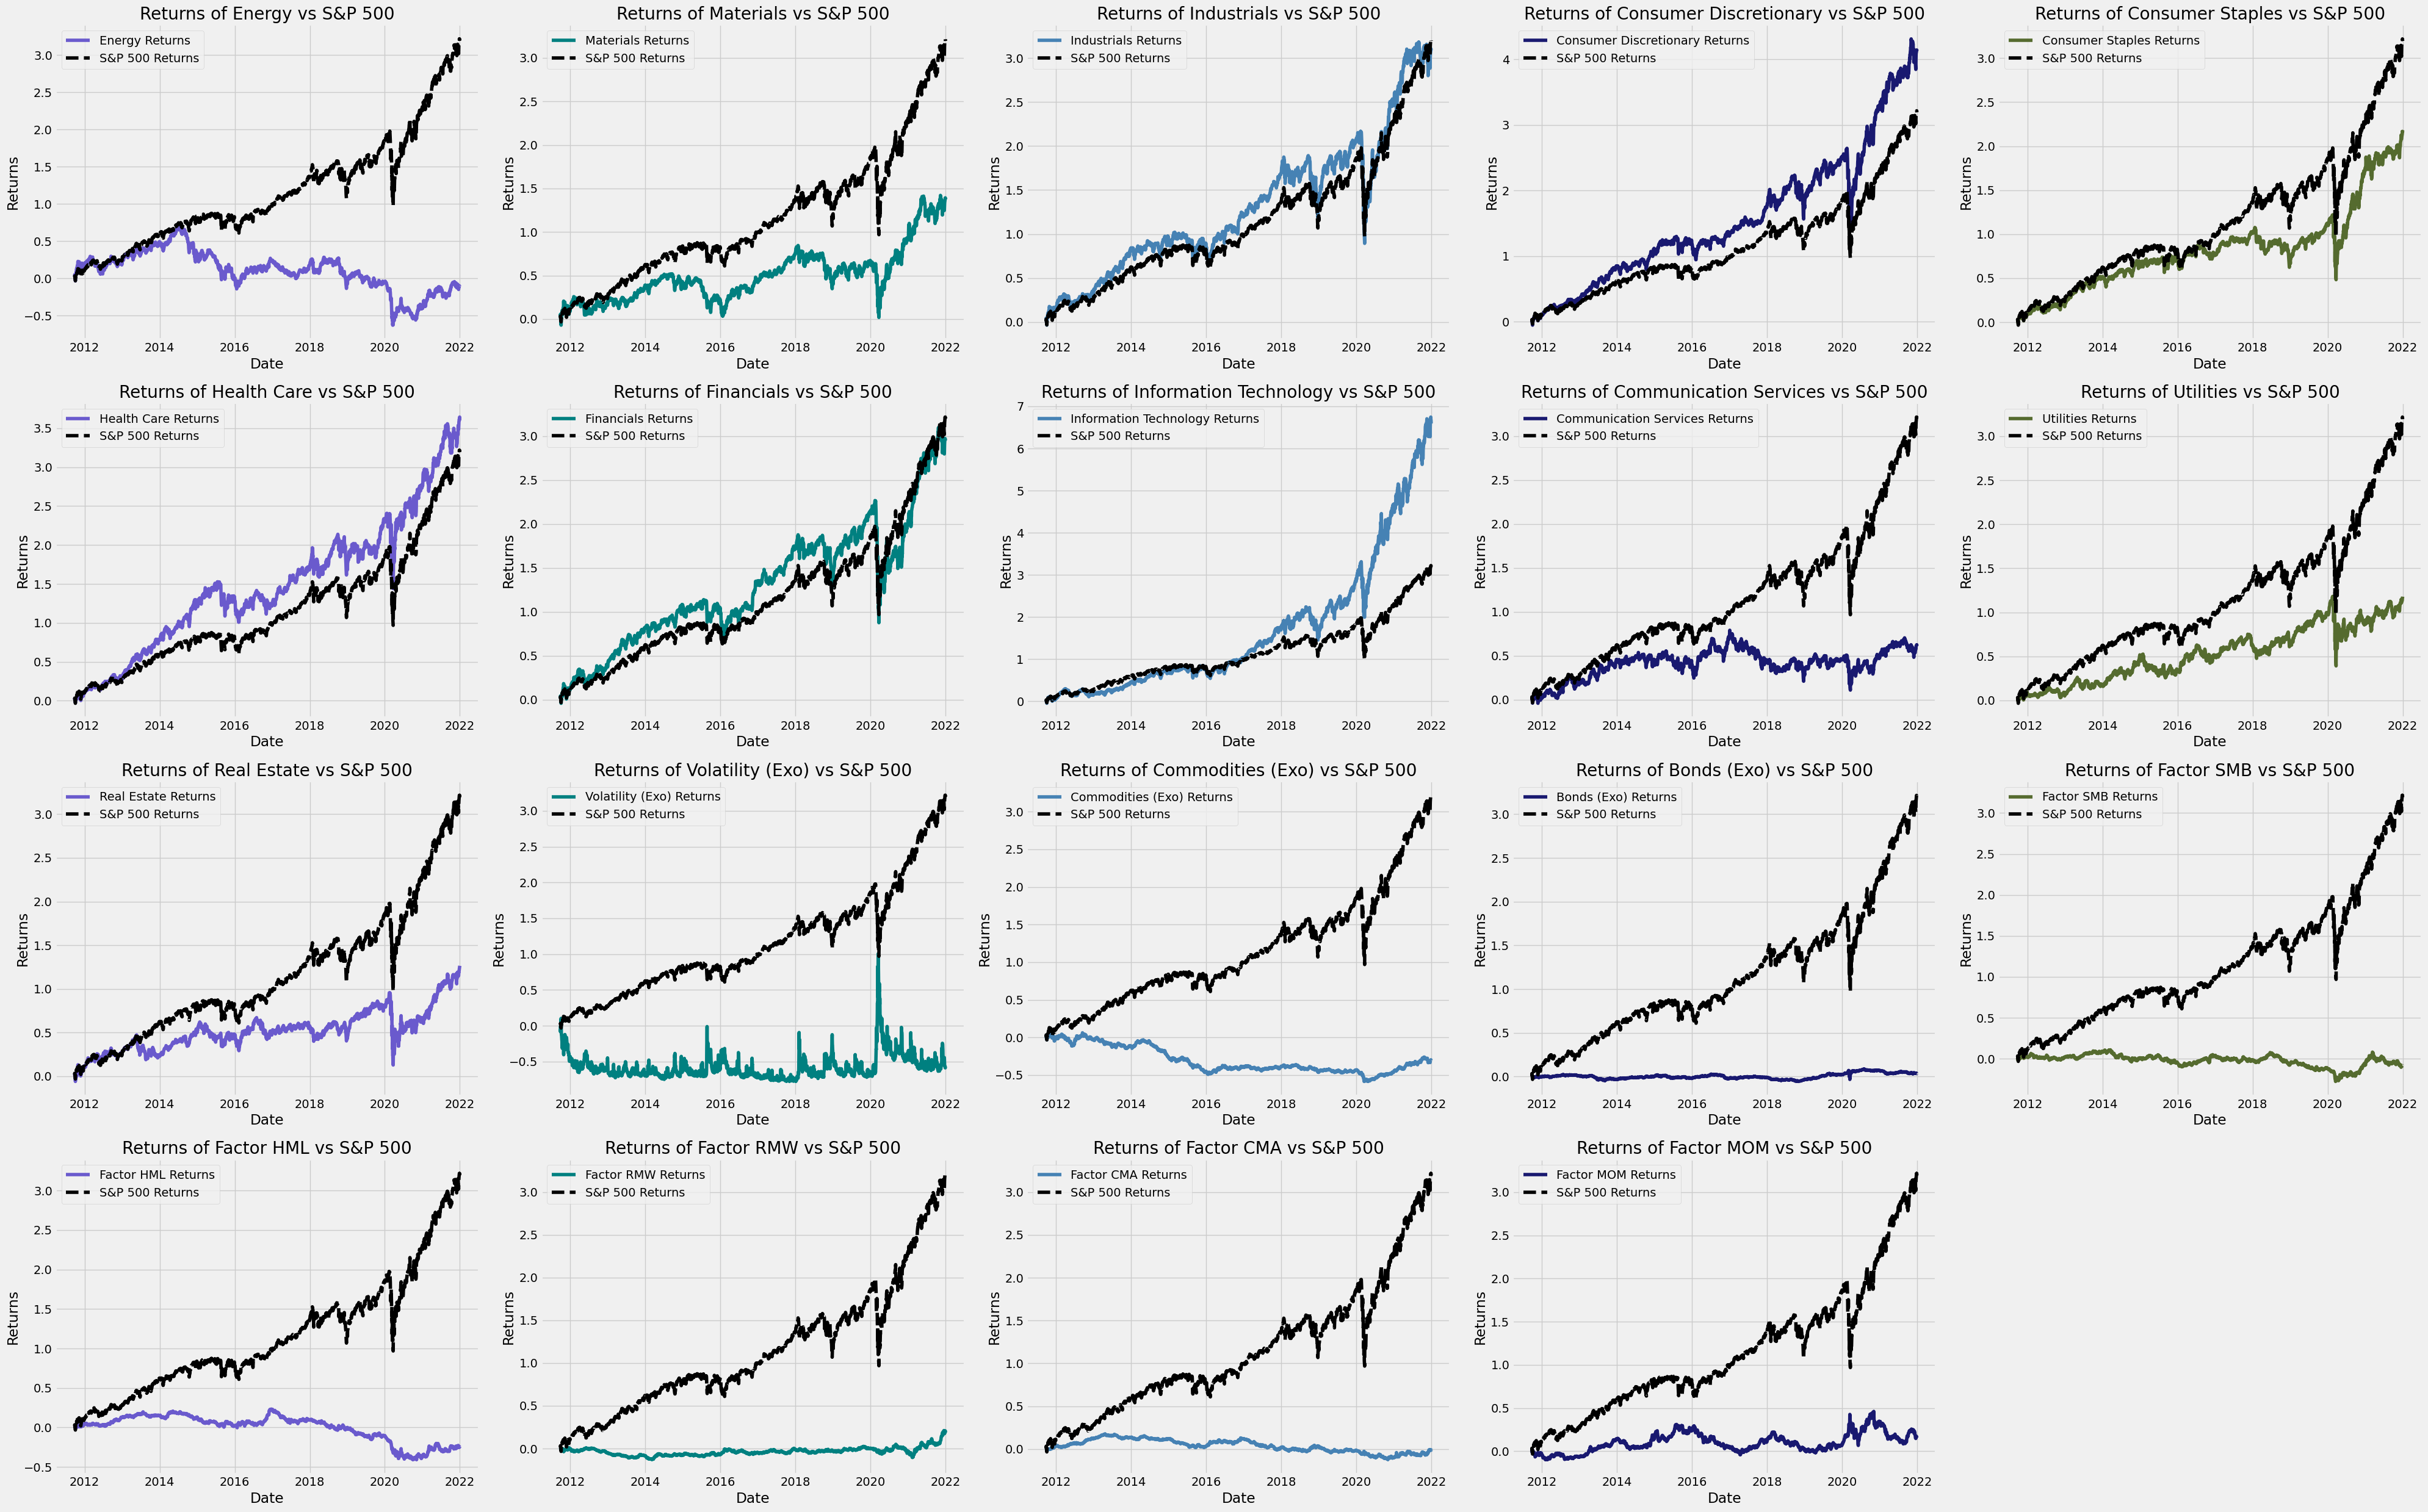

We can now present the cumulative return for each of our portfolio factors, starting with our sector returns. A clear distinction emerges between cyclical and counter-cyclical sectors. Energy, Materials, Consumer Staples, Utilities, and Communication Services consistently underperform relative to the benchmark, while cyclical, higher-growth sectors such as Information Technology, Consumer Discretionary, and Financials exhibit outperformance. This is unsurprising given that the dataset covers a period of strong economic growth since 2012, characterized by accommodative monetary policy. However, this observation highlights a potential bias in current portfolio construction methods, which may overweight prevailing trends without accounting for potential reversals in economic conditions that could alter sector performance.

Our exogenous factors and Fama-French factors also demonstrate that low correlation with the benchmark does not necessarily confer an advantage if the cumulative performance is significantly lower. Allocating to our commodity exogenous factor, for example, would have generated negative returns over this period, while bonds would have produced only a fraction of the benchmark's returns. Once again, the VIX index stands out among the exogenous factors. While it does not provide consistent cumulative returns like the benchmark, it offers significant short-term hedging capabilities that can mitigate the impact of major drawdowns.

Similarly, our selection of Fama-French factors produced uncorrelated but generally poor returns as a contribution to the portfolio. However, our momentum factor performs notably better than the derived Fama-French factors. Although its overall performance is still lower than the benchmark, it offers a more attractive return profile and provides support during market downturns.

#### 1.4 What is the Black-Litterman Portfolio

The initial formulation of the Black-Litterman model for portfolio construction was described in a 1992 paper. This paper presented an intuitive solution by combining the mean-variance optimization framework of Markowitz with the Capital Asset Pricing Model (CAPM) of Sharpe and Lintner. One of the key issues with the CAPM model and the minimum-variance portfolio described by Markowitz is that small changes in input values can lead to significant rebalancing of the portfolio. The Markowitz framework essentially takes the risk-free return as the alternative benchmark. In contrast, the Black-Litterman model uses equilibrium risk premiums as a neutral reference point for expected returns, generating a market-capitalization-weighted portfolio and incorporating subjective views that tilt the portfolio toward assets favored by the investor to generate alpha. The Black-Litterman model does not assume that the market is always in CAPM equilibrium, but it does assume that any deviation from this equilibrium will experience market pressure to revert. Furthermore, the model allows the investor to express as many or as few views as they wish, on either an absolute or relative basis.

We will undertake the following steps in the next few sections to construct our portfolio according to the Black-Litterman framework. First, we will assign our portfolio weights based on the market capitalization of our benchmark portfolio. As previously outlined, we will allocate 92% of our portfolio to the S&P 500 sectors, which we have proxied using iShares ETFs, and we will weight them according to their share of the S&P 500 in 2022. The remaining 8% of the portfolio will be equally split across our three exogenous factors, four Fama-French factors, and custom momentum factor. Based on these weights, we will derive the implied market returns for each of our factors. Because this method derives the market-implied returns, the framework does not recommend deviating from the market returns until we formulate views about the factors that cause them to deviate from the implied returns on either an absolute or relative basis. Once we have formulated our views on the market, we will combine our market-implied returns and views using Bayes' Theorem to construct a posterior returns distribution.

We will then use our posterior returns distribution to calculate our view-adjusted optimal weights for our portfolio. Finally, after completing this optimization, we will compare the performance of our new portfolio against the S&P 500 benchmark from 2022 to 2024. 

Fig. 6 Adjusted Weights from S&P 500 per GICs Sector (2022) 

| Sector                 | Weights   |
|:-----------------------|:----------|
| Energy                 | 3.40%     |
| Materials              | 2.39%     |
| Industrials            | 7.36%     |
| Consumer Discretionary | 10.86%    |
| Consumer Staples       | 5.70%     |
| Health Care            | 12.24%    |
| Financials             | 10.58%    |
| Information Technology | 25.85%    |
| Communication Services | 8.83%     |
| Utilities              | 2.39%     |
| Real Estate            | 2.39%     |

While the Markowitz mean-variance optimisation is designed to use discrete returns, the Black-Litterman model is based on log return which we will use here. 

$$

R_{i} = log(1 + \frac{P_{i+1}}{P_i})

$$

#### 1.5 Prior Returns Distribution and Reverse Optimisation

We consider the market to be composed of $N$ securities or assets. We consider that the returns of these assets are normally distributed with the following parameters: 

$$
X \sim N(\mu, \Sigma)
$$

The Black-Litterman model acknowledges the difficulty in accurately estimating the correct value for $\mu$, and chooses instead to model it as a random variable that is normally distributed with the following parameters:

$$
\mu \sim N(\pi, \tau \Sigma)
$$

The value for $\pi$ represent the best guess for $\mu$ and the value $\tau \Sigma$ is the uncertainty of this estimation. We assume that our model has no estimation error and thereby set $\tau$ equal to zero and we can therefore conclude that the return on our market assets follows:

$$
X \sim N(\pi, \Sigma)
$$

Under normal market conditions, we assume that investors maximize a mean-variance trade-off to produce the following relationship:

$$
\omega = \{ arg \max_{\omega} \omega' \pi - \lambda\omega' \Sigma\omega \}
$$

In normal optimization under a Markowitz framework, we would aim to construct an accurate distribution of returns and then use that to derive an optimal portfolio allocation for each of our assets. However, in the Black-Litterman model, we take a different approach. Instead of estimating returns directly, we start by assuming that the market weights for our $N$ assets represent an optimal allocation. This leads us to solve the returns estimation problem by deriving the implied returns based on these market allocations.

We will initially solve the formula without constraints, allowing us to arrive at a closed-form solution. Afterward, we will introduce additional constraints that would be reasonable for the average investor to encounter. These constraints will be solved using quadratic programming to provide more robust portfolio allocations:

$$
arg \max_{\omega} \omega' \pi - \lambda\omega' \Sigma\omega
$$

- $\omega$: a vector of our sector weights
- $\pi$: a vector of our implied returns
- $\lambda$: a scalar factor for risk-aversion
- $\Sigma$: covariance matrix for our returns

We take the derivative with respect to $\omega$ and then set our equation equal to $0$:

$$
\pi - 2 \lambda \Sigma w = 0
$$

We re-arrange our equation for $\pi$ to give us an equation for our implied equilibrium returns and a formula for optimal weights.

$$
\pi^{*} = 2 \lambda \Sigma w
$$

$$
\omega^{*} = \frac{1}{2 \lambda} \Sigma^{-1} \pi
$$


We can now calculate the implied market returns from our model based upon the market weights provided by the corresponding benchmark.

Fig. 7 Implied Equilibrium Returns vs Expected Return

|                        | Implied Return   | Average Return   | Avg. - Impl. Return   |
|:-----------------------|:-----------------|:-----------------|:----------------------|
| Energy                 | 6.77%            | -1.14%           | 7.91%                 |
| Materials              | 6.02%            | 8.51%            | -2.49%                |
| Industrials            | 5.89%            | 13.76%           | -7.86%                |
| Consumer Discretionary | 5.18%            | 15.94%           | -10.76%               |
| Consumer Staples       | 4.45%            | 11.28%           | -6.83%                |
| Health Care            | 4.72%            | 14.92%           | -10.20%               |
| Financials             | 6.05%            | 13.39%           | -7.34%                |
| Information Technology | 6.31%            | 19.77%           | -13.46%               |
| Communication Services | 4.90%            | 4.67%            | 0.24%                 |
| Utilities              | 3.57%            | 7.59%            | -4.02%                |
| Real Estate            | 4.88%            | 7.97%            | -3.09%                |
| Volatility (Exo)       | -29.10%          | -8.52%           | -20.58%               |
| Commodities (Exo)      | 1.58%            | -3.57%           | 5.16%                 |
| Bonds (Exo)            | -0.05%           | 0.33%            | -0.38%                |
| Factor SMB             | 0.74%            | -0.88%           | 1.62%                 |
| Factor HML             | 0.42%            | -2.71%           | 3.13%                 |
| Factor RMW             | -0.32%           | 1.79%            | -2.11%                |
| Factor CMA             | -0.35%           | -0.08%           | -0.27%                |
| Factor MOM             | -0.51%           | 1.40%            | -1.91%                |

Now that we have calculated the implied return, we can arrange it alongside the average return derived from the data to observe the difference. The contrast is quite stark for all our sector factors. The average return is significantly higher for the majority of our sector factors, particularly in the higher growth and cyclical sectors, where there is almost a double-digit return difference compared to our implied return. If we were to use these average returns to optimize our portfolio, we would likely end up with a highly leveraged portfolio concentrated in the cyclical sectors.

Our exogenous and investable Fama-French factors are more challenging to discuss at this stage, as we have arbitrarily assigned them market weights. These factors will offer more interesting insights after we conduct the portfolio optimization.

#### 1.6 Formulating Views

Naturally, if we plug these implied returns back into our formula for the optimal weights, we will arrive back at the market weights we initially used to derive the returns. The Black-Litterman model only suggests a deviation from the market returns once we have formulated views on assets. We need to specify our forward-looking views on the market, which may or may not clash with the reference market distribution.

Views can either be expressed in absolute or relative terms. We will define the following views:

- View 1: Energy will generate an absolute return of 6.50%
- View 2: Information Technology will outperform Financials by 10bps. 
- View 3: The subset defensive sectors (Consumer Staples & Healthcare) will outperform the subset cyclical sectors (Consumer Discretionary & Materials) by 50bps. 

Even though we have both absolute and relative views, this does not necessarily imply that we should positively allocate to the asset we expect to either return positively or outperform another asset. We need to compare our prediction against the implied return from the existing market weights and determine whether our view produces a positive or negative deviation from the implied market return. Only in the event of a positive deviation would we then increase our potential allocation.

For example, in our first view, we have an implied excess return for Energy at 6.77%, so an expected return of 6.50% would represent a decrease of 27 bps. Therefore, we should expect to see a reduction in the market allocation to this sector.

Similarly, although we predict an outperformance by Information Technology over Financials, we need to evaluate the existing outperformance between the two sectors. Currently, the Information Technology sector outperforms Financials by 26 bps. A prediction of 10 bps would represent a decrease in the current outperformance, which could lead to a reduction in the allocation to Information Technology or an increase in the allocation to Financials.

The calculation becomes more complex when evaluating multiple sectors against each other due to interlinking allocation dynamics. We will need to form two mini-portfolios, with each sector given a proportional weighting to its market weights, and then compare the performance of these two portfolios to determine whether our relative prediction will generate a positive or negative bias toward the existing allocation.

Fig. 8 Comparing Subset Sector Implied Excess Return

|                      | Market Weight   | Relative Subset Weight  | Weighted Return     |
|:---------------------|:---------------:|:-----------------------:|:-------------------:|
| Consumer Staples     | 5.70%           | 31.77%                  | 1.41%               |
| Healthcare           | 12.24%          | 68.23%                  | 3.22%               |
|                      |                 | **Total**               | **4.63%**           |

|                        | Market Weight   | Relative Subset Weight  | Weighted Return     |
|:-----------------------|:---------------:|:-----------------------:|:-------------------:|
| Consumer Discretionary | 10.86%          | 81.96%                  | 4.25%               |
| Materials              | 2.39%           | 18.04%                  | 1.09%               |
|                        |                 | **Total**               | **5.33%**           |

As we can see, the current subset of defensive sectors is underperforming the cyclical sectors by 70 bps, so we are anticipating a relative change of 120 bps. This significant expected shift should lead to a noticeable re-allocation in our new portfolio allocations compared to the existing market portfolio, with a tilt towards our highlighted defensive sectors.

Now that we have formulated our views on the market and have expectations for how these views should influence our portfolio re-allocations, we can proceed to the mathematical formulation and implementation of our views into our model.

#### 1.7 Views Matrices and Posterior Returns Distribution

$Q$ corresponds to our views vector. We have 3 views so we will generate a $k \times 1$ vector where k is the number of views. Each view contains a degree of uncertainty about our confidence in the view and this is represented by $ \epsilon $. This term $\epsilon$ is a random, unknown, independent, normally distributed error term with a distribution:

$$
\epsilon \sim \mathcal{N}(0, \Omega)
$$

The error term itself does not enter our Black Litterman model but the difference between the error term and the expected value of $0$ will enter the model. The variance represents the uncertainty; larger the variance, the greater the uncertainty. 

The expressed views in our $Q$ vector are then mapped to the corresponding asset by the matrix $P$. Each expressed view generates a $1 \times N$ row vector and ultimately gives us a $K \times N$ matrix. The difference between an absolute view and a relative view in our matrix is defined by the row total for each option. Relative views will sum to 0 on each row, while Absolute views will not. 

Our first view was an absolute view on the Energy sector to return 6.50%. As a result the row vector will be defined with a 1 on the first asset and zeroes on all the other assets:

$$
P_1 = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
$$


The second view is a relative view on two assets. We expect Information Technology, the 8th asset, to outperform Financials, the 7th asset. Given that this is a relative view on two assets, the nominally outperforming asset will receive a positive weighting, while the underperforming asset will receive a negative weighting, with the restriction that the row must sum to 0. We will apply +1 and -1 to the two assets, respectively:

$$
P_2 \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
$$

In the event that we are comparing multiple assets for a relative view, the situation becomes slightly more complicated. The same restriction that the row must sum to 0 still applies to relative views, but we now need to assign values to four assets rather than just two. Satchell and Scowcroft demonstrate the use of an equal weighting scheme, while Idzorek suggests a market capitalization approach. Following the Satchell and Scowcroft approach leads to a simple solution: apply a positive $\frac{1}{N}$ weighting to outperforming assets and a negative $\frac{1}{N}$ weighting to underperforming assets.

$$
P_3 = \begin{bmatrix}
    0 & -0.5 & 0 & -0.5 & 0.5 & 0.5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
$$

This formulation is straightforward to implement, but it ignores the portfolio weights and can lead to more extreme rebalancing in smaller-weight sectors. Idzorek proposes that we introduce the relative subset weight for our sectors instead, to mitigate this excessive re-allocation without requiring additional calculations.


$$
P = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & -0.1804 & 0 & -0.8196 & 0.3177 & 0.6823 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
$$

We will follow the framework set out by Meucci (2010) to incorporate the views matrices into our model. The Black-Litterman model considers views on expectations. Therefore we can see that our matrix $P$ would affect our variable $\mu$:

$$
P \mu \sim N(v, \Omega)
$$

where the parameters $v$ and $\Omega$ quantify our views and the uncertainity. We can write this in terms of equality of distribution i.e. two variables that are distributed identically:

$$
v \overset{d}{=} P\mu + Z
$$

where $Z \sim N(0, \Omega) $. We can therefore model $v$ as a random variable $V$ whose distribution, conditional on the realisation of $\mu$:

$$
V \mid \mu \sim N(P \mu, \Omega)
$$

The conditional pdf of this variable is: 

$$
f_{V \mid \mu}(v) \equiv \frac{ {\lvert \Omega \rvert}  ^{-\frac{1}{2}}}{(2\pi)^{\frac{K}{2}}} \exp^{\left(-\frac{1}{2} (v - P \mu)' \Omega^{-1} (v - P \mu)\right)}
$$

To determine the posterior of $\mu$ given $V$ we apply the Bayes Rule:


$$
f_{\mu \mid v}(\mu) = \frac{f_{\mu, V}(\mu, v)}{f_{V}(v)} = \frac{f_{V \mid \mu}(v) f_{\mu}(\mu)}{\int f_{V \mid \mu}(v) f_{\mu}(\mu) \, d\mu}
$$

We obtain the distribution and following equations:

$$
\mu \mid v; \Omega \sim N(\mu_{BL}, \Sigma_{BL}^{\mu})
$$

where 

$$
\begin{array}{rl}
\mu_{BL} &\equiv  ((\tau \Sigma)^{-1} + P' \Omega^{-1} P)^{-1} ((\tau \Sigma)^{-1} \pi + P' \Omega^{-1} v) \\
\Sigma_{BL}^{\mu} &\equiv ((\tau \Sigma)^{-1} + P' \Omega^{-1} P)^{-1}
\end{array}
$$

This is the default formulation for the Black-Litterman model but Meucci provides some further calculations for a more computation stable formulation. 

Using the following matrix identity ($A$ and $D$ invertible, $B$ and $C$ generic, conformable, potentailly of a different size)

$$
(A - BD^{-1}C)^{-1} = A^{-1}-A^{-1}B(CA^{-1}B - D)^{-1} CA^{-1}
$$

We can re-write our formula for $\mu_{BL}$:

$$
\begin{array}{rl}
\mu_{BL} &{=} \space \space ((\tau \Sigma)^{-1} + P' \Omega^{-1} P)^{-1} ((\tau \Sigma)^{-1} \pi + P' \Omega^{-1} v) \\
&{=} \space \space ((\tau \Sigma) - (\tau \Sigma) P' (P (\tau \Sigma)P' + \Omega)^{-1} P(\tau \Sigma))((\tau \Sigma)^{-1}\pi + P' \Omega^{-1}v) \\
&{=} \space \space \pi + (\tau \Sigma) P' (\Omega^{-1} - (P (\tau \Sigma) P' + \Omega)^{-1} P (\tau \Sigma) P' \Omega^{-1} ) v - (\tau \Sigma) P' (P (\tau \Sigma) P' + \Omega)^{-1}P \pi

\end{array}
$$

Given that:

$$
\Omega^{-1} - (P (\tau \Sigma) P' + \Omega )^{-1} P (\tau \Sigma) P' \Omega^{-1} = (P(\tau \Sigma) P' + \Omega)^{-1}
$$

Then we can re-write our formulations:

$$
\begin{array}{rl}
\mu_{BL} &\equiv  \pi + (\tau \Sigma) P' (P (\tau \Sigma) P' + \Omega^{-1})(v - P\pi) \\
\Sigma_{BL} &\equiv (1 + \tau) \Sigma - (\tau \Sigma) P' (P( \tau \Sigma) P' +\Omega )^{-1} P (\tau \Sigma)
\end{array}
$$

This provides us with the necessary posterior parameters to generate our views adjusted implied returns. While we will replace our value for $\mu$ our optimisation will only require the default $\Sigma$.

#### 1.8 Unconstrained Optimisation for Black-Litterman Portfolio Weights

Now that we have the posterior returns for our sectors we can now obtain the optimal weights for this new distribution. We simple substitute our implied equilibrium returns for our views adjusted returns from and our new optimisation problem follows:

$$
arg \max_{\omega} \omega'\mu_{BL} - \lambda\omega'\Sigma\omega
$$


As we saw earlier in an unconstrained problem this gives us the neat solution:

$$
w^{*} = \frac{1}{2 \lambda} \Sigma^{-1} \mu_{BL}
$$

We can now compare across all our two return distributions and subsequent changes in market allocation. 

Fig. 9 - Pre-and-Post Optimisation Portfolio Weights

|                        | Adjusted Return   | Implied Return   | Adj. - Impl. Return   | Adjusted Weights   | Equilibrium Weights   | Adj. - Eq. Weights   |
|:-----------------------|:------------------|:-----------------|:----------------------|:-------------------|:----------------------|:---------------------|
| Energy                 | 6.35%             | 6.77%            | -0.42%                | 4.19%              | 3.40%                 | 0.78%                |
| Materials              | 5.60%             | 6.02%            | -0.42%                | -3.89%             | 2.39%                 | -6.28%               |
| Industrials            | 5.58%             | 5.89%            | -0.31%                | 7.30%              | 7.36%                 | -0.06%               |
| Consumer Discretionary | 4.73%             | 5.18%            | -0.45%                | -17.67%            | 10.86%                | -28.53%              |
| Consumer Staples       | 4.38%             | 4.45%            | -0.07%                | 16.68%             | 5.70%                 | 10.98%               |
| Health Care            | 4.96%             | 4.72%            | 0.25%                 | 35.81%             | 12.24%                | 23.57%               |
| Financials             | 5.77%             | 6.05%            | -0.28%                | 12.31%             | 10.58%                | 1.73%                |
| Information Technology | 5.96%             | 6.31%            | -0.34%                | 23.82%             | 25.85%                | -2.03%               |
| Communication Services | 4.72%             | 4.90%            | -0.19%                | 8.76%              | 8.83%                 | -0.07%               |
| Utilities              | 3.66%             | 3.57%            | 0.09%                 | 2.37%              | 2.39%                 | -0.02%               |
| Real Estate            | 4.76%             | 4.88%            | -0.12%                | 2.37%              | 2.39%                 | -0.02%               |
| Volatility (Exo)       | -27.69%           | -29.10%          | 1.41%                 | 0.99%              | 1.00%                 | -0.01%               |
| Commodities (Exo)      | 1.44%             | 1.58%            | -0.15%                | 0.99%              | 1.00%                 | -0.01%               |
| Bonds (Exo)            | -0.06%            | -0.05%           | -0.01%                | 0.99%              | 1.00%                 | -0.01%               |
| Factor SMB             | 0.58%             | 0.74%            | -0.16%                | 0.99%              | 1.00%                 | -0.01%               |
| Factor HML             | 0.29%             | 0.42%            | -0.13%                | 0.99%              | 1.00%                 | -0.01%               |
| Factor RMW             | -0.35%            | -0.32%           | -0.04%                | 0.99%              | 1.00%                 | -0.01%               |
| Factor CMA             | -0.31%            | -0.35%           | 0.04%                 | 0.99%              | 1.00%                 | -0.01%               |
| Factor MOM             | -0.42%            | -0.51%           | 0.09%                 | 0.99%              | 1.00%                 | -0.01%               |

The first thing to note from our new portfolio weights is that the Black-Litterman model is very resistant to changing allocations unless a view specifically requires it. Although there has been significant rebalancing, our Industrials, Communication Services, and Utilities sectors, along with our exogenous and Fama-French factors, have experienced very little adjustment to their allocations. The most significant reallocation has involved taking large short positions in the cyclical sectors Consumer Discretionary and Materials, and subsequently increasing positions in Consumer Staples and Healthcare.

There are more restrained moves in our Information Technology and Financials sectors, with a slight rebalancing away from the former toward the latter. We also see a slight increase in the Energy sector allocation, despite expecting a lower return compared to the market, potentially because its adjusted return still offers the best return relative to other sectors.

Fig. 10 - Portfolio Allocations by Risk Aversion - Kelly vs Market vs Trustee

|                        | Equilibrium Weights   | Kelly Weights   | Market Weights   | Trustee Weights   |
|:-----------------------|:----------------------|:----------------|:-----------------|:------------------|
| Energy                 | 3.40%                 | 97.83%          | 4.19%            | -9.07%            |
| Materials              | 2.39%                 | -21.66%         | -3.89%           | -1.37%            |
| Industrials            | 7.36%                 | 0.16%           | 7.30%            | 8.31%             |
| Consumer Discretionary | 10.86%                | -98.40%         | -17.67%          | -6.24%            |
| Consumer Staples       | 5.70%                 | 38.36%          | 16.68%           | 13.61%            |
| Health Care            | 12.24%                | 82.39%          | 35.81%           | 29.22%            |
| Financials             | 10.58%                | -24.12%         | 12.31%           | 17.47%            |
| Information Technology | 25.85%                | 24.94%          | 23.82%           | 23.67%            |
| Communication Services | 8.83%                 | 0.20%           | 8.76%            | 9.97%             |
| Utilities              | 2.39%                 | 0.05%           | 2.37%            | 2.70%             |
| Real Estate            | 2.39%                 | 0.05%           | 2.37%            | 2.70%             |
| Volatility (Exo)       | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Commodities (Exo)      | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Bonds (Exo)            | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Factor SMB             | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Factor HML             | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Factor RMW             | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Factor CMA             | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |
| Factor MOM             | 1.00%                 | 0.02%           | 0.99%            | 1.13%             |

We now compute the optimisation with three varying values of the risk aversion parameter $\lambda$. We can derive three common risk aversion parameters using the following equations:

- $\lambda = 0.01 / 2 $: Kelly investor favours a concentrated portfolio
- $\lambda = 2.24 / 2 $ average, market investor 
- $\lambda = 6 / 2 $: risk-averse investor represents trustee

The portfolio allocations are arranged in decreasing order of risk aversion. The allocation for the Kelly investor is very extreme, favoring highly concentrated long positions in the Energy, Consumer Staples, Healthcare, and Information Technology sectors. Almost all other sectors have zero exposure unless a significant short position is taken, as seen with Financials, Materials, and Consumer Discretionary. This portfolio has taken nearly all the expressed views to the extreme, bearing very little resemblance to the other portfolios or equilibrium weights.

The market weights correspond to those from our previously discussed unconstrained optimization, but it is striking to see the difference in allocations when moving from the Kelly to the Market risk aversion parameter. The Trustee portfolio shows a fair amount of overlap with the market portfolio. We observe more restrained short positions in Consumer Discretionary and Materials but see a significant short position in the Energy sector. This may seem slightly counterintuitive, but perhaps the portfolio aims to limit exposure on a risk-adjusted basis.

#### 1.9 Constrained Optimisation

Now that we have our default Black-Litterman model defined and initialized, we can move on to producing a more robust solution for our portfolio construction. Currently, we are performing unconstrained optimization, but in reality, investors often face a number of constraints. In our unconstrained portfolio, we are taking significant short positions in both Consumer Discretionary and Materials, which we want to eliminate to produce a long-only portfolio. In addition to the no short position constraint, we will also add a no leverage constraint.

Our maximisation problem is formulated slightly differently now:

$$
arg \max_{\omega} \omega'\pi - \lambda\omega'\Sigma\omega
$$

s.t.

$$
w_{i} \geq 0
$$

$$
\sum_{i=1}^{n} w_{i} = 1

$$

- $\omega$: a vector of our sector weights
- $\pi$: a vector of our equilibrium returns
- $\lambda$: a scalar factor for risk-aversion
- $\Sigma$: covariance matrix for our returns
- $\textbf{1}$: This is a vector of 1

When we express a constraint to quadprog() we need to express it in the following form:

$$
\textbf{C}' \textbf{w} \geq \textbf{b}
$$

- $\textbf{C}$: is the matrix that represents the coefficients of the weights $w_{i}$
- $\textbf{b}$: is a matrix representing the right hand side of our inequality. 

We need to re-formulate our two constraints into similar formats so that we know how to define our two matrix inputs into our model. We can begin with our no-short selling constraint and convert into matrix form. For a portfolio of $n$ assets, the no-short selling constraint can be written as the following set of inequalities: 

$$
w_1 \geq 0, \quad w_2 \geq 0, \quad \dots, \quad w_n \geq 0
$$

We can therefore represent this in matrix form as: 

$$
\begin{bmatrix}
1 & 0 & \dots & 0 \\
0 & 1 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
\geq
\begin{bmatrix}
0 \\
0 \\
\vdots \\
0
\end{bmatrix}
$$

This means that if we want to represent the constraint in the same format as the quadprog() is expecting we get the following values:

- $\textbf{C} = \textbf{I}$, where $I$ is an identity matrix of size $n \times n$
- $\textbf{b} = \textbf{0}$, a vector of length $n$

For our no leverage constraint it is straightforward to convert our summation notion into a matrix form:

$$
\begin{bmatrix}
1 & 1 & \dots & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
=
1
$$

- $\textbf{C} = \textbf{1}$, where $1$ is an $1 \times n$ matrix and every value is 1.
- $\textbf{b} = 1$, an integer value

Now that we have successfully reformulated our constraints in a format amenable to quadprog() we have our constraint matrices:

$$
C = 
\begin{bmatrix}
\textbf{I} \\
\textbf{1}
\end{bmatrix}
$$

$$
b = 
\begin{bmatrix}
\textbf{0} \\
1
\end{bmatrix}
$$

Fig 11. Constrained Optimisation Portfolio Weights

|                        | Equilibrium Weights   | Unconstrained Adjusted Weights   | Constrained Adjusted Weights   | Difference           |
|:-----------------------|:----------------------|:---------------------------------|:-------------------------------|:---------------------|
| Energy                 | 3.40%                 | 4.19%                            | 5.12%                          | 0.93%                |
| Materials              | 2.39%                 | -3.89%                           | 0.00%                          | 3.89%                |
| Industrials            | 7.36%                 | 7.30%                            | 0.08%                          | -7.22%               |
| Consumer Discretionary | 10.86%                | -17.67%                          | 0.00%                          | 17.67%               |
| Consumer Staples       | 5.70%                 | 16.68%                           | 14.63%                         | -2.05%               |
| Health Care            | 12.24%                | 35.81%                           | 36.00%                         | 0.19%                |
| Financials             | 10.58%                | 12.31%                           | 9.75%                          | -2.56%               |
| Information Technology | 25.85%                | 23.82%                           | 17.63%                         | -6.19%               |
| Communication Services | 8.83%                 | 8.76%                            | 6.76%                          | -2.00%               |
| Utilities              | 2.39%                 | 2.37%                            | 3.50%                          | 1.12%                |
| Real Estate            | 2.39%                 | 2.37%                            | 1.27%                          | -1.10%               |
| Volatility (Exo)       | 1.00%                 | 0.99%                            | 0.95%                          | -0.04%               |
| Commodities (Exo)      | 1.00%                 | 0.99%                            | 0.00%                          | -0.99%               |
| Bonds (Exo)            | 1.00%                 | 0.99%                            | 0.00%                          | -0.99%               |
| Factor SMB             | 1.00%                 | 0.99%                            | 0.00%                          | -0.99%               |
| Factor HML             | 1.00%                 | 0.99%                            | 3.40%                          | 2.41%                |
| Factor RMW             | 1.00%                 | 0.99%                            | 0.00%                          | -0.99%               |
| Factor CMA             | 1.00%                 | 0.99%                            | 0.71%                          | -0.28%               |
| Factor MOM             | 1.00%                 | 0.99%                            | 0.19%                          | -0.80%               |

The imposition of the no-short constraint immediately causes our previous short positions to be reduced to a neutral position, resulting in no exposure to those two sectors. The Consumer Staples position is reduced slightly, but the high conviction in Healthcare remains. To maintain these two overweight positions without the short positions, all other factors in the portfolio experience a reduction in their weights compared to the Unconstrained Portfolio. In particular, we lose exposure to half of our Fama-French factors and exogenous factors. The portfolio appears to have reduced positions in the sectors with the lowest adjusted returns. The constraints have worked as expected, but they also generate a larger deviation from the equilibrium weights in the process.

#### 1.10 Tracking Error

Tracking error is defined as the difference between the portfolio return and the benchmark return over a defined period and a given frequency. 

$$
TE = \sqrt{\frac{1}{T - 1} \sum_{t=1}^{T} (R_p(t) - R_b(t))^2}
$$

$R_p(t)$: is the portfolio return at time $t$
$R_b(t)$: is the benchmark return at time $t$
$T$: is the number of time periods

Most active managers are benchmarked against a specific index, in our framework we have replicated the S&P 500 via individual sectors and are seeking to incorporate views into our market portfolio to generate alpha. However, by deviating from the market we are taking on active risk, and our views are not qualified in terms of their strength. By incorporating an optimisation with respect to Tracking Error we can build a portfolio that limits active risk unless we have significantly divergent views. 

We can use the methodology defined by Jorion (2002) for portfolio optimisation with a tracking error constraint. We will we optimising for deviations $x$ on our equilibrium weights with the goal of maximising the return on the deviations subject to a constraint $T$ on the volatility of the tracking error. 

We will define our new variables below:

- Our new portfolio weight will be the sum of the equilibrium weights and the optimal deviations: $\omega_p = \omega_{eq} + x$: 
- The variance of the tracking error: $ T = x' \Sigma x $
- The sum of the deviations must be equal to zero: $x'1 = 0$

We can now set up our optimisation as the following: 

$$
max \space x' \pi
$$

$$
s.t.
$$

$$
x'1 = 0
$$

$$
x' \Sigma x = T
$$



We will compute our optimisation for three different values (low, neutral, high) of $T$ to see the effects on our portfolio.

Fig. 12 Tracking Error Constrained Optimisation

|                        | Adjusted Return   | Equilibrium Weights   | Tracking Error - Low Tolerance   | Tracking Error - Neutral Tolerance   | Tracking Error - High Tolerance   |
|:-----------------------|:------------------|:----------------------|:---------------------------------|:-------------------------------------|:----------------------------------|
| Energy                 | 6.35%             | 3.40%                 | 3.88%                            | 5.25%                                | 8.64%                             |
| Materials              | 5.60%             | 2.39%                 | 2.72%                            | 3.63%                                | 5.95%                             |
| Industrials            | 5.58%             | 7.36%                 | 7.63%                            | 8.36%                                | 10.27%                            |
| Consumer Discretionary | 4.73%             | 10.86%                | 11.03%                           | 11.47%                               | 12.69%                            |
| Consumer Staples       | 4.38%             | 5.70%                 | 5.82%                            | 6.13%                                | 6.96%                             |
| Health Care            | 4.96%             | 12.24%                | 12.33%                           | 12.53%                               | 13.15%                            |
| Financials             | 5.77%             | 10.58%                | 10.89%                           | 11.75%                               | 13.93%                            |
| Information Technology | 5.96%             | 25.85%                | 26.03%                           | 26.45%                               | 27.68%                            |
| Communication Services | 4.72%             | 8.83%                 | 9.02%                            | 9.54%                                | 10.89%                            |
| Utilities              | 3.66%             | 2.39%                 | 2.56%                            | 3.02%                                | 4.19%                             |
| Real Estate            | 4.76%             | 2.39%                 | 2.67%                            | 3.45%                                | 5.40%                             |
| Volatility (Exo)       | -27.69%           | 1.00%                 | 0.04%                            | -2.03%                               | -8.92%                            |
| Commodities (Exo)      | 1.44%             | 1.00%                 | 0.93%                            | 0.72%                                | 0.27%                             |
| Bonds (Exo)            | -0.06%            | 1.00%                 | 0.74%                            | -0.07%                               | -1.92%                            |
| Factor SMB             | 0.58%             | 1.00%                 | 0.83%                            | 0.31%                                | -0.86%                            |
| Factor HML             | 0.29%             | 1.00%                 | 0.88%                            | 0.52%                                | -0.30%                            |
| Factor RMW             | -0.35%            | 1.00%                 | 0.71%                            | -0.17%                               | -2.22%                            |
| Factor CMA             | -0.31%            | 1.00%                 | 0.73%                            | -0.09%                               | -1.99%                            |
| Factor MOM             | -0.42%            | 1.00%                 | 0.57%                            | -0.75%                               | -3.81%                            |

Unsurprisingly, as we increase the tracking error tolerance, the portfolio deviates further from the equilibrium portfolio. However, rather than gradually converging towards our unconstrained mean-variance portfolio with high bets on Healthcare and Consumer Staples, the portfolio actually shifts more heavily towards a larger position in Energy. We have included the views-adjusted returns to help provide clarity, and we can see that since the Energy sector has the highest predicted risk-adjusted return, the portfolio overweights Energy. This is because the most efficient way to minimize return differentials while adhering to the tracking error constraint is to take larger positions in the higher return-generating sectors.

As a result, even though we might expect a more conservative differential portfolio to perform well according to our views matrix, the tracking error-constrained portfolio is far more reluctant to invest in these lower return assets despite our views. This reluctance arises because doing so would lead to a higher tracking error from the predicted returns.

#### 1.11 Portfolio Performance 

Fig. 13 Cumulative Portfolio Returns

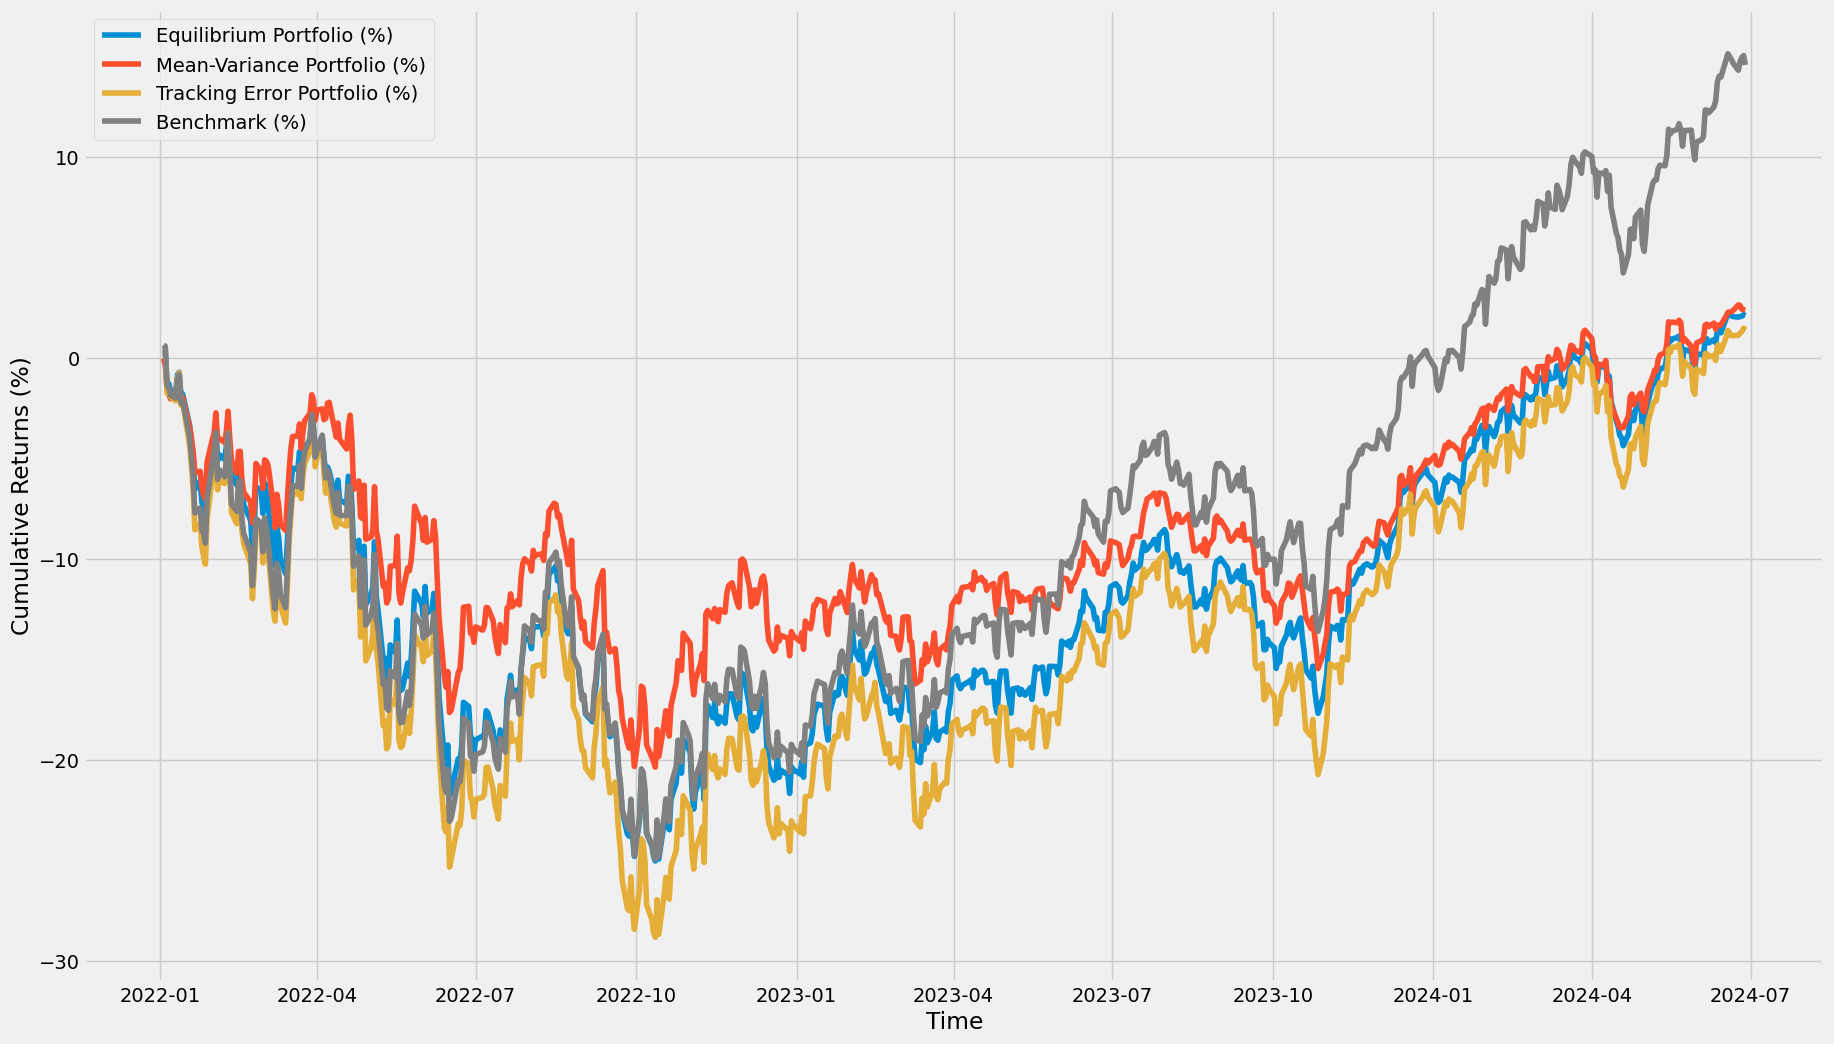

We can now plot the cumulative returns for our two optimized portfolios (Mean-Variance & Tracking Error) against both our Equilibrium (2022 weights) portfolio and the real-world returns of the S&P 500 as our benchmarks. We observe that these portfolios do not meaningfully diverge from the benchmarks until Q2 of 2023, when the S&P 500 begins to recover from the market downturn of the previous year, and cyclical sectors like Information Technology start generating strong returns.

As expected, our Tracking Error portfolio closely tracks the performance of our Equilibrium portfolio. However, due to the shift away from more cyclical sectors and the overweight position in our defensive sector, Energy, this portfolio manages to generate a small amount of alpha until 2023. In contrast, our Mean-Variance portfolio diverged much more strongly from the Equilibrium portfolio, substantially allocating to defensive sectors and avoiding the considerable drawdown experienced by the other portfolios throughout 2022. This strategy allowed the Mean-Variance portfolio to generate significant alpha over both benchmark portfolios until late 2023, when the market decisively shifted in favor of cyclical sectors, particularly those related to AI.

The results suggest that our views were well-informed until 2023, at which point a portfolio rebalancing should have taken place with some revisions to our views to incorporate new market trends.

#### 1.12 Conclusion

This report has demonstrated the usefulness of the Black-Litterman model for portfolio construction. The model provides an intuitive framework for building a robust and appropriately diversified portfolio that can easily incorporate the investor's views about market conditions. The framework devised by Black and Litterman can be implemented in its basic form and offers natural options to extend the model and improve the robustness of the results.

However, the model defined in this paper encountered some limitations that could be addressed in subsequent iterations. The Tracking Error optimization would benefit from additional constraints to improve robustness. Currently, the model only supports very tight assignments to the total Tracking Error variance before it diverges into unrealistic portfolio allocations. Both of the existing models strongly allocate away from our exogenous and Fama-French factors, despite both the VIX and MOM factors providing interesting diversification benefits during times of market stress, as observed in the initial analysis of the portfolio.

Another limitation is that the model lacks the ability to favor different allocations in varying market regimes. In the absence of strongly supportive views, the model struggles to justify allocating to sectors that provide returns on a less consistent basis. Finally, we were unable to implement extensions that could qualify the strength of the market views. The current model treats each view as equally strong, and the ability to provide a range of market outcomes with different probabilities would significantly enhance the robustness of the portfolio results.

#### User Defined Functions


|  Function                                | Description            | 
|:-----------------------------------------|:----------------------|
| calculate_covariance_matrix              | Computes the covariance matrix for the assets using their log returns, including standard deviations and correlations.                 |
| calculate_implied_equilibrium_returns    |  Derives the implied equilibrium returns based on the equilibrium weights and the covariance matrix, scaled by the risk aversion parameter.               | 
| calculate_views_adjusted_returns         | Calculates the views-adjusted returns by combining the implied equilibrium returns with the investor's views, using Meucci's framework                | 
| calculate_unconstrained_mv_optimisation  | Computes the optimal portfolio weights without any constraints, using mean-variance optimization based on the views-adjusted returns.                 | 
| calculate_constrained_mv_optimisation    | Computes the optimal portfolio weights with constraints (no short selling, no leverage) using quadratic programming.                | 
| calculate_tracking_error_optimisation    | Optimizes the portfolio to minimize tracking error against the benchmark, subject to specific constraints.                 | 
| calculate_rolling_beta                   | Rolling window to compute the covariance between a factor's returns and market returns, dividing by the market variance | 
| calculate_rolling_alpha                  | Rolling window to perform linear regression between market returns and factor returns, extracting the intercept as alpha estimate                | 


#### Bibliography

Black, F. and Litterman, R. 1990. Asset Allocation: Combining Investors Views with Market Equilibrium. Goldman Sachs Fixed Income Research working paper

Black, F. and Litterman, R. 1991. Global Asset Allocation with Equities, Bonds, and Currencies. Goldman Sachs Fixed Income Research working paper

Black, F. and Litterman, R. 1992. Global Portfolio Optimization

Fama, E. and French, K. 2004. The Capital Asset Pricing Model: Theory and Evidence

Fama and French Data Library - http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

Fama, E. and French, K. 2003. Production of U.S. Rm-Rf, SMB, and HML in the Fama-French Data Library (December 18, 2023). Chicago Booth Research Paper No. 23-22, Fama-Miller Working Paper

Idzorek, T.M. 2002. A step-by-step guide to Black-Litterman model: Incorporating user-specified confidence levels

Jorion, P. 2002. Portfolio Optimization with Constraints on Tracking Error

Markowitz, H., 1952. Portfolio Selection. The Journal of Finance, 7(1): 77-91.

Meucci, A. 2010. The Black-Litterman Approach: Original Model and Extensions

Satchell, S. and Scowcroft, A. 2000. A Demystification of the Black-Litterman Model: Managing Quantitative and Traditional Construction. 

Sharpe, W. 1964. Capital Asset Prices: A Theory of Market Equilibrium under Conditions of Risk
